<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/week-Apr.-17/Copy_of_DataDazzlers_Tuning_Hyperparms_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
import itertools
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')


Neural Networks

Tuning Hyperparameters

Dataset: AirBNB





In this project we will use the New York City Airbnb Open Data:

https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv

We'll be working with the 'price' variable, and we'll transform it to a classification task.


In [ ]:
#Dataframe and numerical library
import pandas as pd 
import numpy as np
from scipy import stats

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from matplotlib import rcParams

#Stats
from scipy import stats

#Machine Learning Model
#Metrics
from sklearn.metrics import mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error


#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Linear Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

#Ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Others
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier



#Hyper parameter
from sklearn import neighbors, datasets, model_selection

# Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K



Prepare the data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/AirBnB_NYC_2019.csv")
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
41558,32306053,Modern renovated 1 BR in the heart of Manhattan,48339350,Kel,Manhattan,Upper East Side,40.76218,-73.96633,Entire home/apt,136,1,26,2019-06-29,5.91,1,47
42998,33389288,"Cozy Private Room, Walking Distance From LGA, ...",187822288,Zahir,Queens,East Elmhurst,40.77051,-73.87344,Private room,55,1,22,2019-06-19,6.47,5,162
3569,2134052,Large artsy studio with 90s style,7978448,Seth,Manhattan,Chelsea,40.74193,-74.00170,Entire home/apt,90,3,23,2015-12-06,0.36,1,0
27610,21713419,Timeless West Village Townhouse with Garden,158087989,Ben,Manhattan,Chelsea,40.74025,-74.00066,Entire home/apt,400,3,21,2018-10-14,1.09,1,0
40782,31670590,East Village/Union Square Flat,237464350,Jake,Manhattan,East Village,40.73315,-73.98688,Entire home/apt,167,5,13,2019-06-20,2.75,1,91


In [ ]:
df.shape


(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
to_drop = ['id', 'reviews_per_month','name','host_id','last_review','host_name' ]
df = df.drop(to_drop, axis = 1)
df.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
#Let's create a variable above_average which is 1 if the price is above (or equal to) 152.
# Create a new column 'above_average'
df['above_average'] = (df['price'] >= 152).astype(int)

In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,0


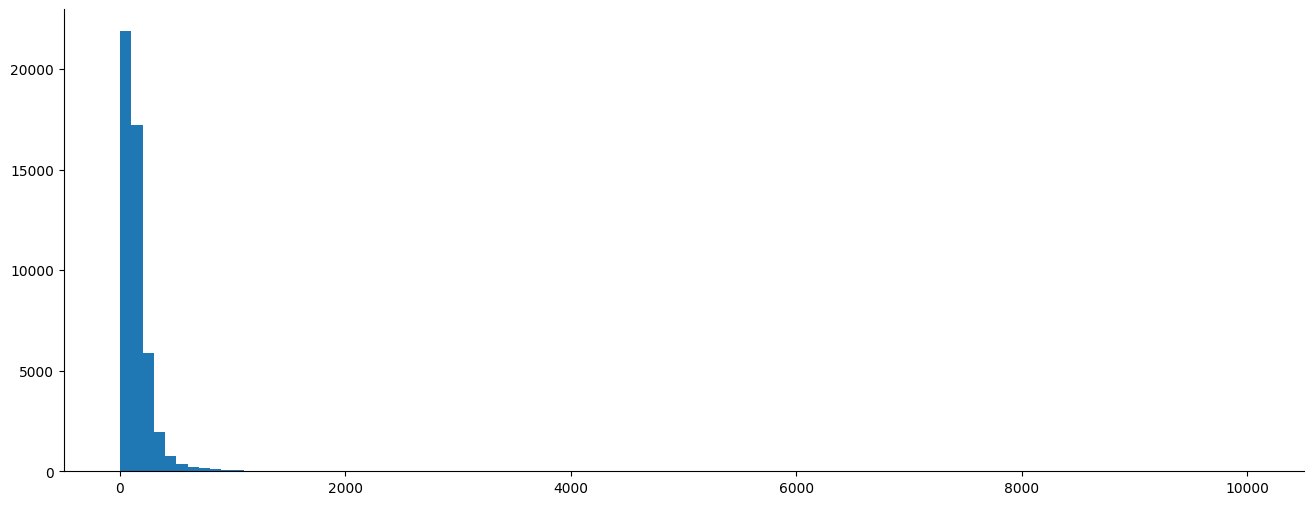

In [ ]:
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['price'], bins=100);

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
print(min(df['price']))
print(max(df['price']))

0
10000


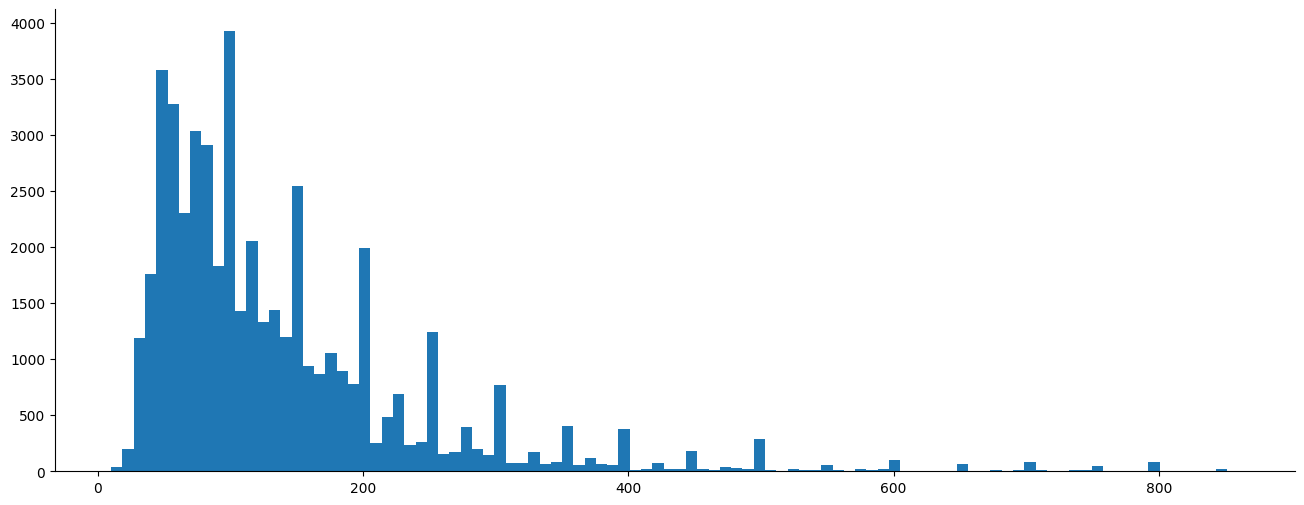

In [ ]:
# Calculate Z-values for price
df['price_z'] = np.abs(stats.zscore(df['price']))

# Filter out outliers
df = df[df['price_z'] <= 3]

# Remove houses listed for $0
df = df[df['price'] != 0]

# Drop the column
df = df.drop('price_z', axis=1)

# Draw a histogram
plt.hist(df['price'], bins=100);

In [ ]:
df.shape

(48496, 11)

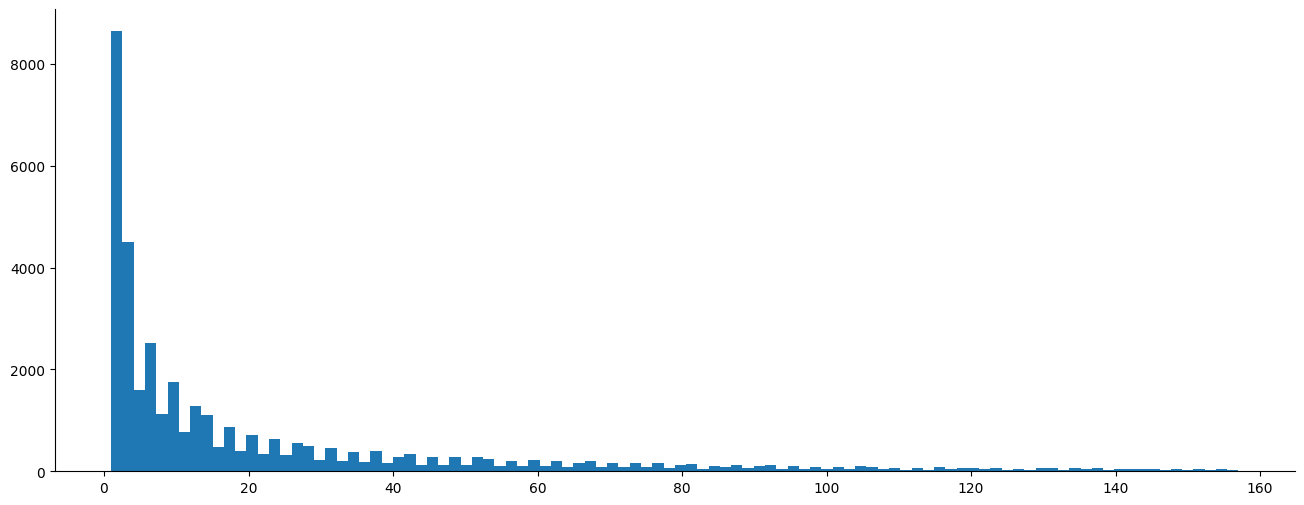

In [ ]:
# Calculate Z-values for number of reviews
df['number_of_reviews_z'] = np.abs(stats.zscore(df['number_of_reviews']))

# Filter out outliers
df = df[df['number_of_reviews_z'] <= 3]

# Remove houses listed for $0
df = df[df['number_of_reviews'] != 0]

# Drop the column
df = df.drop('number_of_reviews_z', axis=1)

# Draw a histogram
plt.hist(df['number_of_reviews'], bins=100);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37434 entries, 0 to 48852
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             37434 non-null  object 
 1   neighbourhood                   37434 non-null  object 
 2   latitude                        37434 non-null  float64
 3   longitude                       37434 non-null  float64
 4   room_type                       37434 non-null  object 
 5   price                           37434 non-null  int64  
 6   minimum_nights                  37434 non-null  int64  
 7   number_of_reviews               37434 non-null  int64  
 8   calculated_host_listings_count  37434 non-null  int64  
 9   availability_365                37434 non-null  int64  
 10  above_average                   37434 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 3.4+ MB


In [ ]:
# Drop original price column
df = df.drop(['price'], axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,1,129,1
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,1,0,0


In [ ]:
df['neighbourhood'].value_counts()

Williamsburg          3051
Bedford-Stuyvesant    3000
Harlem                2126
Bushwick              1882
Hell's Kitchen        1456
                      ... 
Castle Hill              2
New Dorp Beach           2
Rossville                1
Richmondtown             1
Willowbrook              1
Name: neighbourhood, Length: 218, dtype: int64

In [ ]:
df.to_csv("neural_network_cleanup.csv")

In [ ]:
def remap_location(data: pd.DataFrame, 
                   location: str, 
                   threshold: int = 50) -> str:
    if len(data[data['neighbourhood'] == location]) < threshold:
        return 'Rare'
    return location

In [ ]:
df['neighbourhood'] = df['neighbourhood'].apply(
    lambda x: remap_location(data=df, location=x)
)

df.sample(20)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
37359,Queens,Ridgewood,40.69956,-73.90752,Private room,6,2,1,0,0
32337,Brooklyn,Williamsburg,40.71458,-73.96169,Private room,5,67,2,124,0
32310,Brooklyn,Bushwick,40.68641,-73.91200,Private room,2,5,3,0,0
32660,Manhattan,Harlem,40.82414,-73.95139,Private room,2,3,2,68,0
17819,Manhattan,Harlem,40.81970,-73.95326,Private room,2,72,3,72,0
47855,Queens,Woodhaven,40.69405,-73.86693,Private room,2,2,2,364,0
21264,Manhattan,Lower East Side,40.71873,-73.99073,Private room,1,3,1,0,0
28932,Queens,Ridgewood,40.70188,-73.90429,Private room,7,2,2,0,0
3937,Manhattan,Morningside Heights,40.80490,-73.96315,Entire home/apt,14,12,1,0,0
22540,Manhattan,Harlem,40.80567,-73.95677,Entire home/apt,2,82,2,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37434 entries, 0 to 48852
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             37434 non-null  object 
 1   neighbourhood                   37434 non-null  object 
 2   latitude                        37434 non-null  float64
 3   longitude                       37434 non-null  float64
 4   room_type                       37434 non-null  object 
 5   minimum_nights                  37434 non-null  int64  
 6   number_of_reviews               37434 non-null  int64  
 7   calculated_host_listings_count  37434 non-null  int64  
 8   availability_365                37434 non-null  int64  
 9   above_average                   37434 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.1+ MB


In [ ]:
transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['minimum_nights', 'number_of_reviews','calculated_host_listings_count', 
         'availability_365']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['neighbourhood_group', 'neighbourhood', 'room_type'])
)

In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,6,365,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2,355,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,1,0,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,1,129,1
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,49,1,0,0


In [ ]:
X = df.drop('above_average', axis=1)
y = df['above_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit
transformer.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['minimum_nights', 'number_of_reviews',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'neighbourhood',
                                  'room_type'])])

In [ ]:
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [ ]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

##########################################################################

Build Neural Network for AirBNB dataset Classification

Input:

X_train

X_test

y_train

y_test
##########################################################################


In [ ]:
# To optimize the learning rate in tensorflow
tf.random.set_seed(42)

In [ ]:
1e-3 * 10 ** (1 / 30), 1e-3 * 10 ** (100 / 30)


(0.0010797751623277097, 2.1544346900318847)

In [ ]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

initial_history = initial_model.fit(
    X_train,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
936/936 [==============================] - 9s 5ms/step - loss: 0.3999 - accuracy: 0.8053 - lr: 0.0010
Epoch 2/100
936/936 [==============================] - 6s 6ms/step - loss: 0.3876 - accuracy: 0.8132 - lr: 0.0011
Epoch 3/100
936/936 [==============================] - 5s 5ms/step - loss: 0.3854 - accuracy: 0.8138 - lr: 0.0012
Epoch 4/100
936/936 [==============================] - 4s 5ms/step - loss: 0.3841 - accuracy: 0.8145 - lr: 0.0013
Epoch 5/100
936/936 [==============================] - 6s 6ms/step - loss: 0.3822 - accuracy: 0.8153 - lr: 0.0014
Epoch 6/100
936/936 [==============================] - 4s 5ms/step - loss: 0.3803 - accuracy: 0.8165 - lr: 0.0015
Epoch 7/100
936/936 [==============================] - 4s 5ms/step - loss: 0.3793 - accuracy: 0.8179 - lr: 0.0016
Epoch 8/100
936/936 [==============================] - 5s 6ms/step - loss: 0.3778 - accuracy: 0.8193 - lr: 0.0017
Epoch 9/100
936/936 [==============================] - 4s 5ms/step - loss: 0.3767 - accu

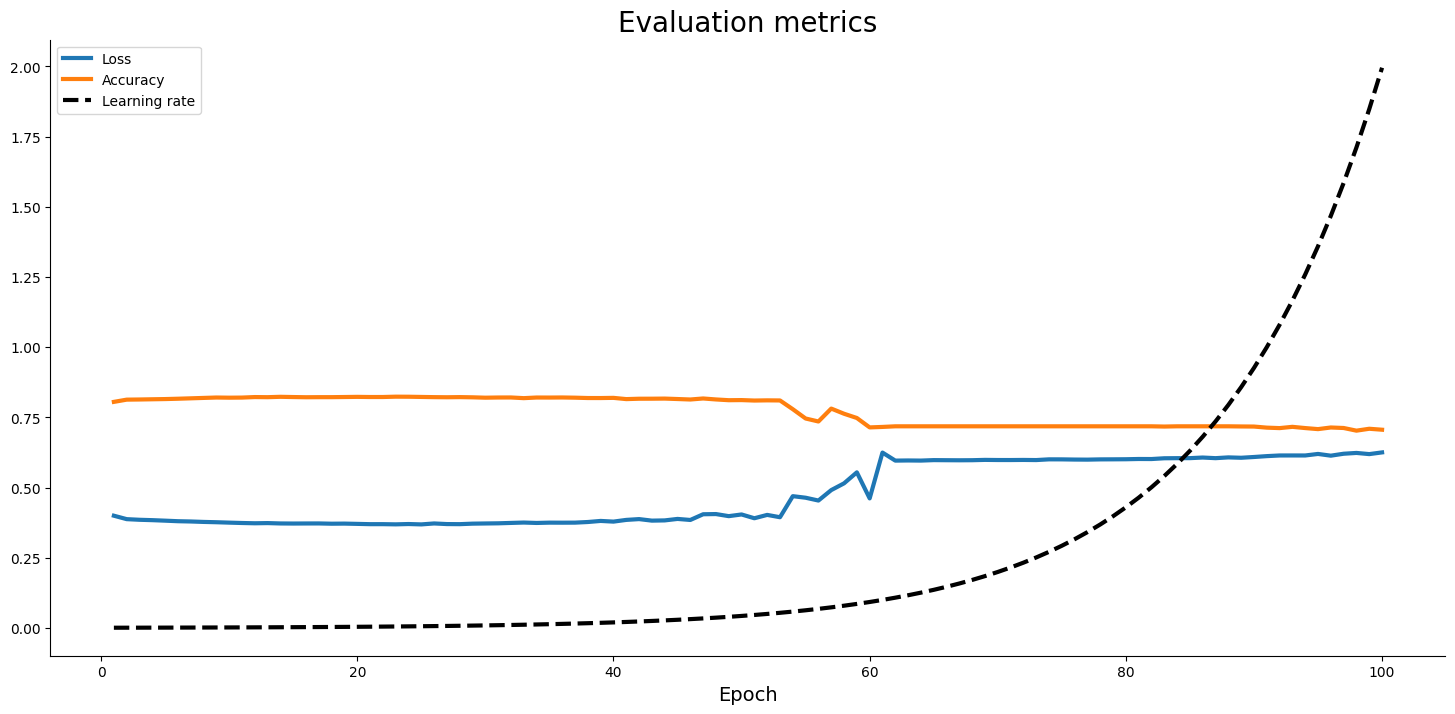

In [ ]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 101), 
    initial_history.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101), 
    initial_history.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

After about 50 epochs 

Loss function increases

Accuracy decreases

Learning rate increasesd

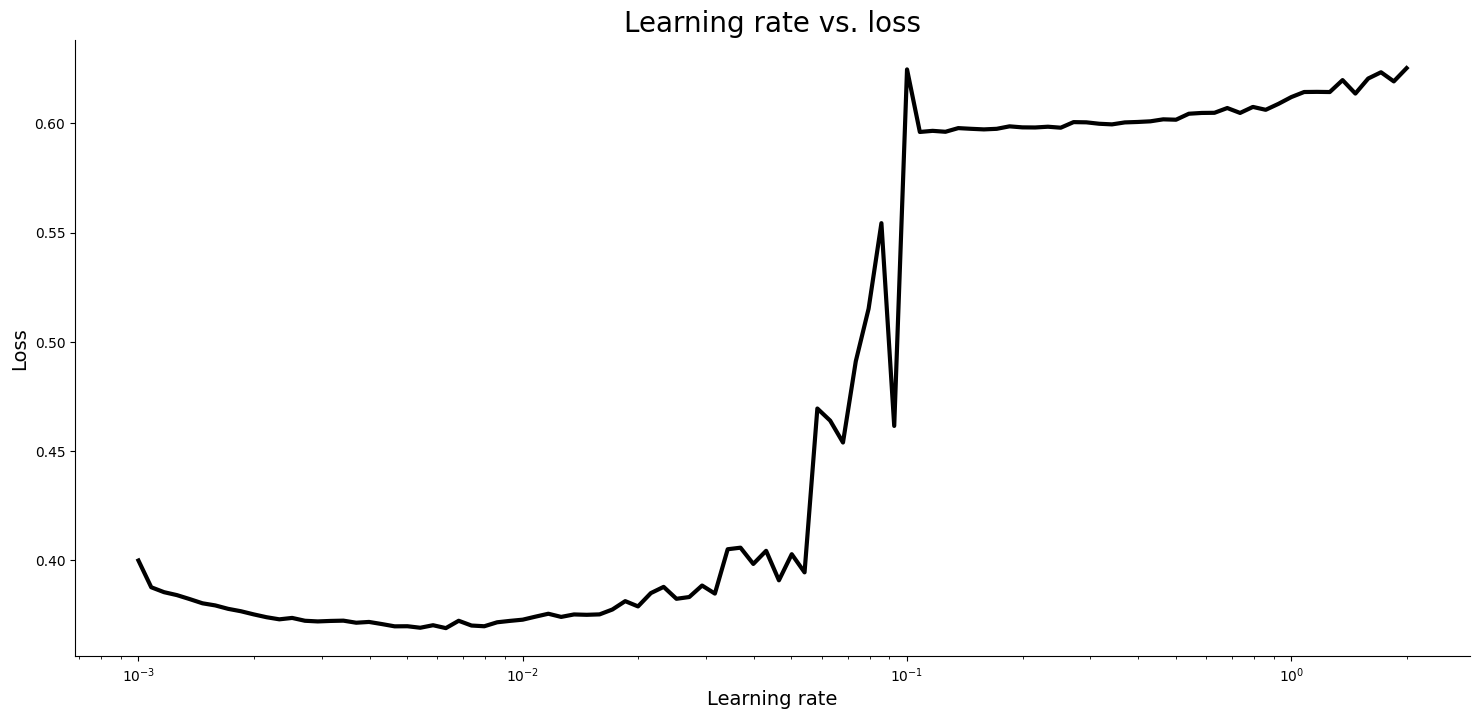

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates, 
    initial_history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [ ]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train,
    y_train,
    epochs=100
)

Epoch 1/100
936/936 [==============================] - 6s 5ms/step - loss: 0.4041 - accuracy: 0.8065
Epoch 2/100
936/936 [==============================] - 6s 6ms/step - loss: 0.3928 - accuracy: 0.8126
Epoch 3/100
936/936 [==============================] - 5s 5ms/step - loss: 0.3895 - accuracy: 0.8133
Epoch 4/100
936/936 [==============================] - 6s 6ms/step - loss: 0.3863 - accuracy: 0.8148
Epoch 5/100
936/936 [==============================] - 5s 5ms/step - loss: 0.3833 - accuracy: 0.8162
Epoch 6/100
936/936 [==============================] - 5s 5ms/step - loss: 0.3807 - accuracy: 0.8160
Epoch 7/100
936/936 [==============================] - 6s 6ms/step - loss: 0.3797 - accuracy: 0.8169
Epoch 8/100
936/936 [==============================] - 5s 5ms/step - loss: 0.3790 - accuracy: 0.8183
Epoch 9/100
936/936 [==============================] - 5s 5ms/step - loss: 0.3766 - accuracy: 0.8193
Epoch 10/100
936/936 [==============================] - 6s 6ms/step - loss: 0.3755 - accura

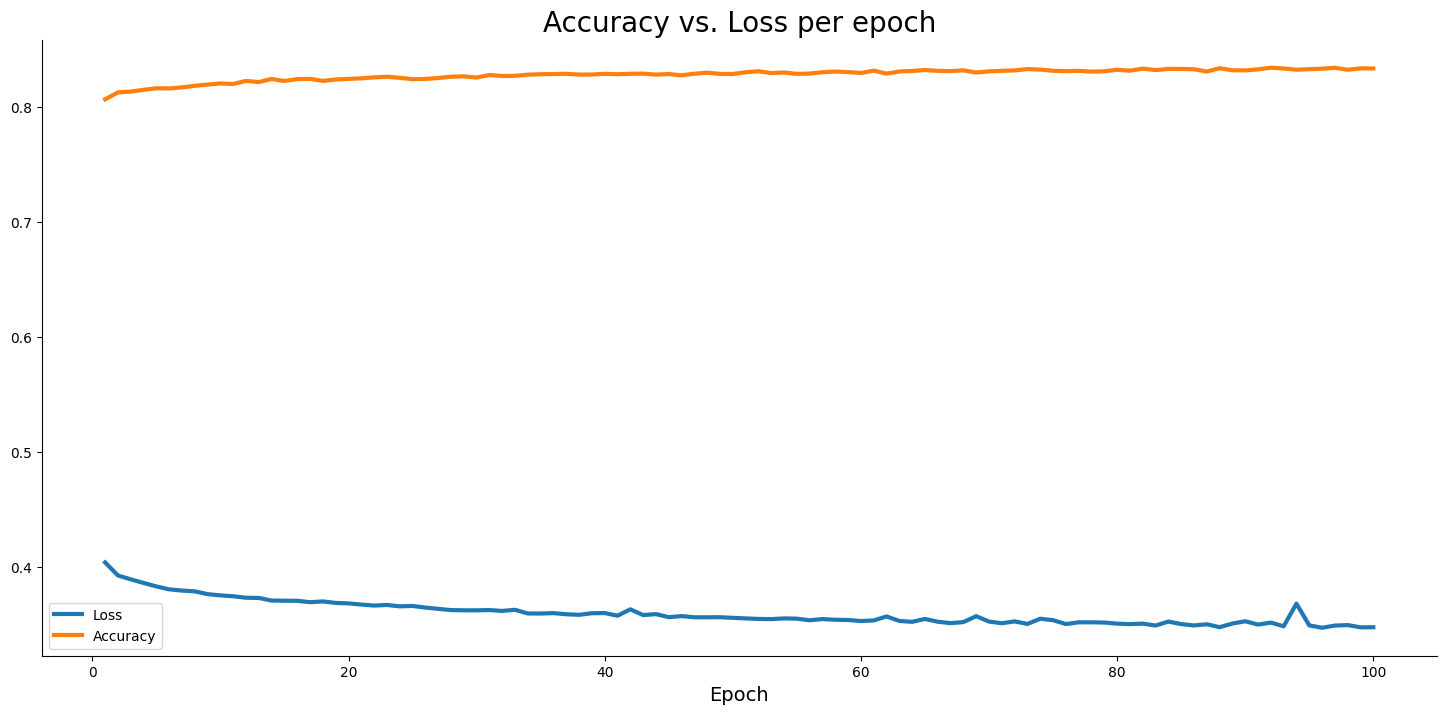

In [ ]:
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history_optimized.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

Accuracy is 80+

Loss function is low

In [ ]:
predictions = model_optimized.predict(X_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

234/234 [==============================] - 1s 3ms/step
Accuracy on the test set: 0.83

Confusion matrix:
[[4788  524]
 [ 774 1401]]



How do you find the Optimal NN Architecture

Input:

X_train

X_test

y_train

y_test

In [ ]:
X.shape

(37434, 9)

In [ ]:
X.shape[1]

9

In [ ]:
X_train.shape

(29947, 97)

In [ ]:
X_test.shape

(7487, 97)

In [ ]:
y_train.shape

(29947,)

In [ ]:
y_test.shape

(7487,)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
num_layers = 3
min_nodes_per_layer = 64
max_nodes_per_layer = 256
node_step_size = 64

In [ ]:
node_options = list(range(
    min_nodes_per_layer, 
    max_nodes_per_layer + 1, 
    node_step_size
))
node_options

[64, 128, 192, 256]

In [ ]:
two_layer_possibilities = [node_options, node_options]

In [ ]:
list(itertools.product(*two_layer_possibilities))

[(64, 64),
 (64, 128),
 (64, 192),
 (64, 256),
 (128, 64),
 (128, 128),
 (128, 192),
 (128, 256),
 (192, 64),
 (192, 128),
 (192, 192),
 (192, 256),
 (256, 64),
 (256, 128),
 (256, 192),
 (256, 256)]

In [ ]:
layer_possibilities = [node_options] * num_layers
layer_node_permutations = list(itertools.product(*layer_possibilities))

In [ ]:
layer_node_permutations

[(64, 64, 64),
 (64, 64, 128),
 (64, 64, 192),
 (64, 64, 256),
 (64, 128, 64),
 (64, 128, 128),
 (64, 128, 192),
 (64, 128, 256),
 (64, 192, 64),
 (64, 192, 128),
 (64, 192, 192),
 (64, 192, 256),
 (64, 256, 64),
 (64, 256, 128),
 (64, 256, 192),
 (64, 256, 256),
 (128, 64, 64),
 (128, 64, 128),
 (128, 64, 192),
 (128, 64, 256),
 (128, 128, 64),
 (128, 128, 128),
 (128, 128, 192),
 (128, 128, 256),
 (128, 192, 64),
 (128, 192, 128),
 (128, 192, 192),
 (128, 192, 256),
 (128, 256, 64),
 (128, 256, 128),
 (128, 256, 192),
 (128, 256, 256),
 (192, 64, 64),
 (192, 64, 128),
 (192, 64, 192),
 (192, 64, 256),
 (192, 128, 64),
 (192, 128, 128),
 (192, 128, 192),
 (192, 128, 256),
 (192, 192, 64),
 (192, 192, 128),
 (192, 192, 192),
 (192, 192, 256),
 (192, 256, 64),
 (192, 256, 128),
 (192, 256, 192),
 (192, 256, 256),
 (256, 64, 64),
 (256, 64, 128),
 (256, 64, 192),
 (256, 64, 256),
 (256, 128, 64),
 (256, 128, 128),
 (256, 128, 192),
 (256, 128, 256),
 (256, 192, 64),
 (256, 192, 128),
 (2

In [ ]:
for permutation in layer_node_permutations[:2]:
    for nodes_at_layer in permutation:
        print(nodes_at_layer)
    print()

64
64
64

64
64
128



In [ ]:
models = []

for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(97,)))
    model_name = ''
    
    for nodes_at_layer in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
        model_name += f'dense{nodes_at_layer}_'
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model._name = model_name[:-1]
    
    models.append(model)

In [ ]:
models[0].summary()

Model: "dense64_dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2568 (Dense)          (None, 64)                6272      
                                                                 
 dense_2569 (Dense)          (None, 64)                4160      
                                                                 
 dense_2570 (Dense)          (None, 64)                4160      
                                                                 
 dense_2571 (Dense)          (None, 1)                 65        
                                                                 
Total params: 14,657
Trainable params: 14,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    
    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
        
    return models

In [ ]:
all_models = get_models(
    num_layers=3, 
    min_nodes_per_layer=64, 
    max_nodes_per_layer=256, 
    node_step_size=64, 
    input_shape=(97,)
)

In [ ]:
all_models

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train

array([[2.32185749e-02, 5.12820513e-02, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.40192154e-03, 9.35897436e-01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.48717949e-02, 3.06748466e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [8.00640512e-04, 3.20512821e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.60128102e-03, 2.24358974e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.60128102e-03, 8.33333333e-02, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 50,
             verbose: int = 0) -> pd.DataFrame:
    
    # We'll store the results here
    results = []
    
    def train(model: tf.keras.Sequential) -> dict:
        # Change this however you want 
        # We're not optimizing this part today
        model.compile(
            loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy')
            ]
        )
        
        # Train the model
        model.fit(
            X_train,
            y_train,
            epochs=epochs,
            verbose=verbose
        )
        
        # Make predictions on the test set
        preds = model.predict(X_test)
        prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
        
        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_precision': precision_score(y_test, prediction_classes),
            'test_recall': recall_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes)
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        
    return pd.DataFrame(results)

In [ ]:
optimization_results = optimize(models=all_models,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

234/234 [==============================] - 1s 2ms/step


In [ ]:
optimization_results.sort_values(by='test_accuracy', ascending=False)

,model_name,test_accuracy,test_precision,test_recall,test_f1
19,dense128_dense64_dense256,0.828369,0.720297,0.668966,0.693683
12,dense64_dense256_dense64,0.828102,0.723565,0.660690,0.690699
50,dense256_dense64_dense192,0.827301,0.721608,0.660230,0.689556
16,dense128_dense64_dense64,0.827167,0.727414,0.647816,0.685311
17,dense128_dense64_dense128,0.827034,0.717606,0.667126,0.691446
...,...,...,...,...,...
46,dense192_dense256_dense192,0.822759,0.713065,0.652414,0.681393
54,dense256_dense128_dense192,0.822359,0.713492,0.649195,0.679827
53,dense256_dense128_dense128,0.822359,0.710304,0.656092,0.682122
9,dense64_dense192_dense128,0.822359,0.710934,0.654713,0.681666
